<a href="https://colab.research.google.com/github/JoeAM11/MachineLearning_EM23/blob/main/Tarea05_ML_Febrero_AprendizajaNoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🤖 📓
# Tarea en clase  #05
#### Nombre :Joel Alejandro Rodarte Rivera 
#### Matrícula: 2173260

El siguiente cuaderno contiene:
* Algoritmo aprendizaje automático no supervisado No visto en clase y que se adecua a mi set de datos.
* Estrategia para determinar número de grupos no visto en clase y que se adecua a mi set de datos. 





## Algoritmos no supervisados (Información Binaria)

**IMPORTANTE: Por el momento, considero que la explicación del modelo No me queda muy claro dado existen conceptos de probabilidad con los que no estoy familiarizado. Sin emabargo, me es importante al menos saber de su existencia para dominarlo más adelante en el transcurso del curso.**

[Benroulli Mixture Model](https://stats.stackexchange.com/questions/89535/what-algorithm-should-i-use-to-cluster-a-huge-binary-dataset-into-few-categories#:~:text=A%20classic%20algorithm%20for%20binary,powerful%20but%20also%20more%20difficult.)

* **¿Qué es?**
  * La distribución Bernoulli es una distribución discreta que predice la probablidad de éxito (1) o fracaso (0) de un evento. El término "mixture" se incluye dado que este método combina multiples distribuciónes de probabilidad para modelar una distribucón más compleja. 
  * Respecto al punto anterior, este algoritmo asumme que la información se genera de K mezclas de distribuciónes de Bernoulli, en donde cada componente de la mezcla representa a un cluster.
  * Cada cluster es caracterizado por un vector de probabilidades que predice la probabilidad de encontrar un 1 en ese cluster. La distribución de la mezcla general es entonces una suma ponderada de las distribuciones de K Bernoulli, donde los pesos especifican la proporción de los datos que pertenecen a cada grupo. (?) 
    * Este último punto es el que no me queda muy claro.


* **¿Porqué es conveniente?**
  * K means asume que la información se generó con una distribución Normal (Gaussiana) mientras que la Bernouilli mixiture model puede manejar datos binarios que No están normalmente distribuidos. 


## Clustering para datos binarios

[Akaike Information Criterion](https://builtin.com/data-science/what-is-aic)

El Akaike Information Criterion es un un solo numero que se utiliza para determinar cual dentro de múltiples opciónes de modelos mejor se ajusta para un set de datos. Este numero se puede utilizar en combinación con el Bernoulli Mixture Model para determinar la cantidad de cluster óptima. 


🤖 📓
# Tarea #05
#### Nombre :Joel Alejandro Rodarte Rivera 
#### Matrícula: 2173260

El siguiente cuaderno contiene:



 




In [2]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
df = pd.read_csv('/content/MachineLearning_EM23/Training.csv') #Importar el csv desde mi repositorio en Guthub

Cloning into 'MachineLearning_EM23'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 48 (delta 19), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (48/48), 663.92 KiB | 1.22 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10) #Para evitar que me trunque informacióno o que no despliegue tanta, segun sea necesario 
df = df[df.columns[::-1]] # Me es más logico tener la enfermedad en la primera columna por motivos de organización. 
pd.set_option('display.float_format', '{:.3f}'.format) #que los resultados se impriman con tres decimales


In [ ]:
df.drop(columns=['Unnamed: 133'],inplace=True) #no entiendo porque aparecio una nueva columna, por eso la quito. 

In [ ]:
df.head()

In [ ]:
# Los sintomas más comunes 

common_prognosis = df.mean().sort_values(ascending=False) 
common_prognosis

<ipython-input-224-972ae5685221>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  common_prognosis = df.mean().sort_values(ascending=False)


fatigue                  0.393
vomiting                 0.389
high_fever               0.277
loss_of_appetite         0.234
nausea                   0.233
                          ... 
extra_marital_contacts   0.022
swollen_blood_vessels    0.022
sunken_eyes              0.022
foul_smell_of urine      0.021
fluid_overload           0.000
Length: 132, dtype: float64

In [5]:
# #Para calcular cuantos pacientes tengo paar cada enfermedad, en este caso parece se rque tengo 120 por enfermedad 

prognosis_counts = df.groupby('prognosis').count() 
prognosis_counts

,Unnamed: 133,yellow_crust_ooze,red_sore_around_nose,blister,inflammatory_nails,...,shivering,continuous_sneezing,nodal_skin_eruptions,skin_rash,itching
prognosis,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,120,120,120,120,...,120,120,120,120,120
AIDS,0,120,120,120,120,...,120,120,120,120,120
Acne,0,120,120,120,120,...,120,120,120,120,120
Alcoholic hepatitis,0,120,120,120,120,...,120,120,120,120,120
Allergy,0,120,120,120,120,...,120,120,120,120,120
...,...,...,...,...,...,...,...,...,...,...,...
Tuberculosis,0,120,120,120,120,...,120,120,120,120,120
Typhoid,0,120,120,120,120,...,120,120,120,120,120
Urinary tract infection,0,120,120,120,120,...,120,120,120,120,120


In [ ]:
#Fatiga es el sintoma más comun, por enfermedad en cuantos de los 120 casos SI está presente fatiga

prognosis_sum = df.groupby('prognosis')[['fatigue']].sum() 
prognosis_sum

,fatigue
prognosis,
(vertigo) Paroymsal Positional Vertigo,0
AIDS,0
Acne,0
Alcoholic hepatitis,0
Allergy,0
...,...
Tuberculosis,114
Typhoid,120
Urinary tract infection,0


In [ ]:
#Lo mismo que el anterior pero en porcentaje. En realidad no debería ser porcentaje pero como tengo los datos con 0 y 1, el promedio si es es.

df_prognosis = df.groupby('prognosis')[['fatigue']].mean() 
df_prognosis

,fatigue
prognosis,
(vertigo) Paroymsal Positional Vertigo,0.000
AIDS,0.000
Acne,0.000
Alcoholic hepatitis,0.000
Allergy,0.000
...,...
Tuberculosis,0.950
Typhoid,1.000
Urinary tract infection,0.000


## K means

In [ ]:
# Me deshago de la columna prognosis dado el algoritmo de Kmeans no puede trabajar con variables categóricas.
# Utilizaré los dos síntomas más comunes para ver la combinación de aparición entre ellas para los pacientes.

df_noProg = df.drop(columns=['prognosis']) 
df_noProg_fatigue_vomiting= df_noProg[['fatigue','vomiting']]
df_noProg_fatigue_vomiting

In [ ]:
#Coloco cuatro clusters proque sé que sólo tengo cuatro resultados posibles para X enfermedad 
  #Que paciente no tenga ninguno de los dos síntomas
  #Que paciente tenga fatiga pero no vómito
  #Que paciente tenga vómito pero no fatiga
  #Que paciente tenga ambos síntomas

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)

kmeans.fit(df_noProg_fatigue_vomiting) #Utilizando el df que solo tiene fatiga y vómito

KMeans(n_clusters=4)

In [ ]:
# The predict() method is then used to predict the cluster labels for each data point. 
labels = kmeans.predict(df_noProg_fatigue_vomiting) 
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

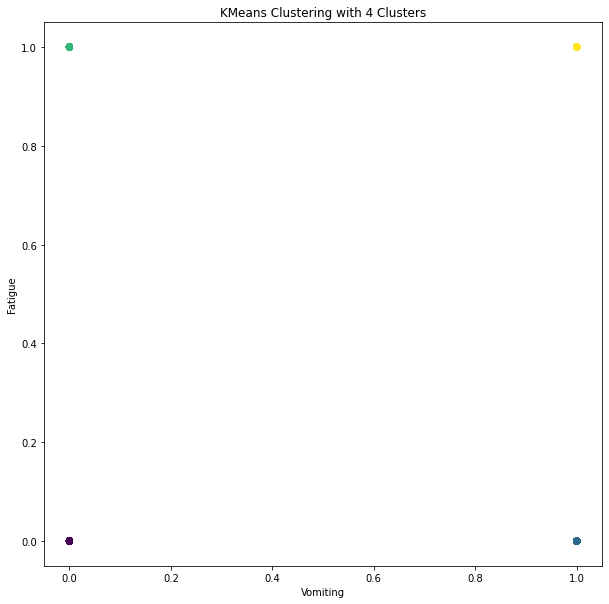

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the clusters
# Dada se cuenta con infromación binaria, se espera que el plot del K medias sea una cuadrado porque solo hay 4 posibles resultados. 

plt.figure(figsize = (10,10))
plt.scatter(df_noProg_fatigue_vomiting.iloc[:, 0], df_noProg_fatigue_vomiting.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Vomiting')
plt.ylabel('Fatigue')
plt.title('KMeans Clustering with 4 Clusters')
plt.show()
plt.savefig("test1.jpg")

In [ ]:
# Coordenadas de los centros de los clusters
# Cómo se esperaba sólo se tienen 4 coordenadas

kmeans.cluster_centers_
df_centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])
df_centers

,x,y
0,0.000,0.000
1,1.000,0.000
2,-0.000,1.000
3,1.000,1.000


In [ ]:
# En kmeans, el tamaño de los grupos es variable y depende SÓLO de la distancia entre sus características
df_centroids_freq = pd.DataFrame(np.unique(kmeans.labels_, return_counts = True)).T
df_centroids_freq.columns = ['ck', 'nk']
df_centroids_freq

#interpretación
  #Se tienen 1826 pacientes que para alguna enfermedad NO tienen ni vomito ni fatiga
  #Se tienen 1152 pacientes que para alguna enfermedad NO tienen fatiga pero SI vómito
  #Se tienen 1170 pacientes que para alguna enfermedad SI tienen fatiga pero NO vómito
  #Se tienen 762 pacientes que para alguna enfermedad SI tienen fatiga y SI vómito


,ck,nk
0,0,1836
1,1,1170
2,2,1152
3,3,762


## Bernouilli Mixture Model



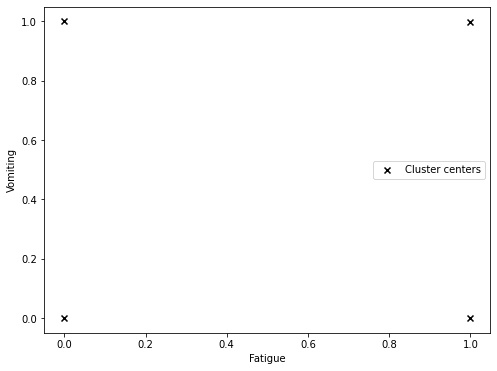

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

# Fit Bernoulli mixture model with 4 components
model = BayesianGaussianMixture(n_components=4, weight_concentration_prior_type="dirichlet_distribution")
model.fit(df_noProg_fatigue_vomiting)

# Get cluster assignments
y = model.predict(df_noProg_fatigue_vomiting)

# Get parameters of each component
means = model.means_

# Plot data and clusters
colors = ['red', 'blue']
plt.figure(figsize=(8, 6))
plt.scatter(means[:, 0], means[:, 1], color='black', marker='x', label="Cluster centers")
plt.xlabel("Fatigue")
plt.ylabel("Vomiting")
plt.legend()
plt.show()

# Seleccion # de clusters adecuado

In [ ]:
# Método del codo 
  # Entender que sucedería que si se itera entre 2 y 8 clusters 
  # Se sabe que con debería ser suficiente con 4 pero, se tratará de dar respuesta en ver cómo cambia la dispersión añadiendo más de 4. 
    # Se espera que la diferencia sea pequeña o nula dsepués de 4. Se pera sea muy grande para menos de 4. 

inertia = []
for n_clusters in range(2, 9):
  kmeans = KMeans(n_clusters=n_clusters).fit(df_noProg_fatigue_vomiting)
  inertia.append(kmeans.inertia_ / n_clusters)

In [ ]:
# Como se esperaba después de 4 la inercia es 0, indicando que 4 es el punto óptimo para hacer el corte.

df_inertias = pd.DataFrame({'n_clusters': range(2, 9), 'inertia': inertia})
df_inertias

,n_clusters,inertia
0,2,584.658
1,3,152.878
2,4,0.000
3,5,0.000
4,6,0.000
5,7,0.000
6,8,0.000


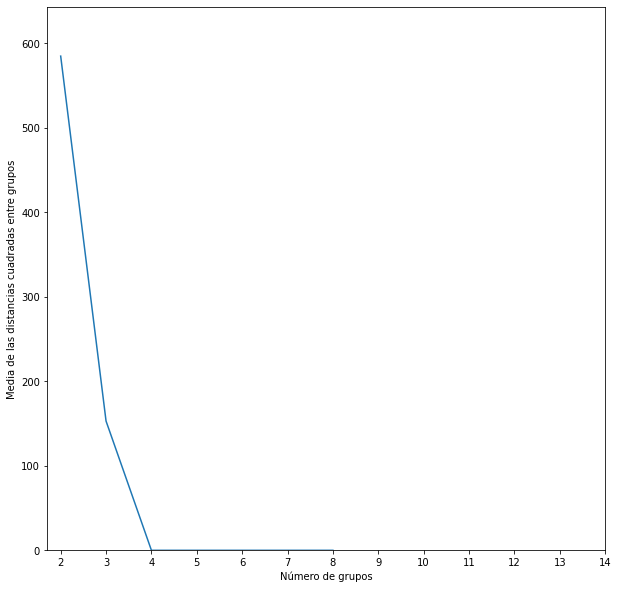

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(df_inertias.n_clusters, df_inertias.inertia)
plt.xlabel('Número de grupos')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.ylim((0, 1.1 * df_inertias.inertia.max()))
plt.xticks(range(2, 15))
plt.show()



#Revista - Publicaciónes Médicas relacionadas con datos 

Para el desarollo de este curso, he encontrado la siguiente revista que se relaciona con la temática de mis set de datos. 

[BMC Medical Informatics and Decision Making](https://bmcmedinformdecismak.biomedcentral.com/)

**Áreas de conocimiento y categorías (Quartil):**
* Health Policy (Q1); Computer Science Applications (Q2); Health Informatics (Q2)

**Tipo de acceso:**
* Open Access

**Enfoque del journal:**
* Journal para publicación de investigaciones sobre diseño, desarrollo, implementación, uso y evaluación de tecnologías de información y toma de decisiones para la salud humana.

**Impact factor:**
* 2.398

**H-Index:**
* 79

**Ranking:**
* 5405

**SCImago Journal Rank (SJR):** 
* .833
* [SCImagoJournal](https://www.scimagojr.com/journalsearch.php?q=23602&tip=sid&clean=0)


## Justificación 

El journal BMC medical informatics and decision making es un journal relevante para el tema de Disease prediction using machine learning bajo las categorías de Health Informatics o Computer Science aplication. La audiencia de este journal consiste en investigadores, médicos y reguladores de leyes interesados en los útlimos desarrollos de tecnologias de la información con aplicación médica y para la toma de decisiones. La investigación propuesta es relevante para esta audiencia, ya que tiene potencial para mejorar los resultados de salud de los pacientes. Además, el journal es open access, lo que promueve el uso de esta investigación en futuros proyectos relacionados. 

Por otro lado, las métricas del journal ayudan a evaluar la callidad, visibilidad y reputación del journal, por lo que fueron consideradas para su selección. En este caso el factor de impacto del 2020 fue de 2.398, según JCR. Esto es útil para evaluar la importancia relativa de un journal en su campo y medir la frecuencia en la que un articulo del journal ha sido citado. Además del factor de impacto, otra métrica son los cuartiles, donde los rankings de los journals en cada categoría son divididos en Q1, Q2, Q3, Q4 de mayor a menor según su JCR y SJR. Para este journal en las áreas de Health Informatics y Computer Science aplication fue de Q2. Esto quiere decir que el journal tiene alto impacto y visibilidad en el campo de la investigación. 

## Algunos artículos relacionados con mi set de datos
[Comparing different supervised machine learning algorithms for disease prediction](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-1004-8)

[Design, implementation, and evaluation of the computer-aided clinical decision support system based on learning-to-rank: collaboration between physicians and machine learning in the differential diagnosis process](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-023-02123-5)

[Predicting mortality in critically ill patients with diabetes using machine learning and clinical notes](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-01318-4)


[Machine learning based efficient prediction of positive cases of waterborne diseases](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-022-02092-1)

[Using machine learning of clinical data to diagnose COVID-19: a systematic review and meta-analysis](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-01266-z
)



# Lineamientos para publicación - Template de LateX

El artículo seguirá los lineamientos de la siguiente liga segun el Journal. 

[Research article](https://bmcmedinformdecismak.biomedcentral.com/submission-guidelines/preparing-your-manuscript/research-article
)


